In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
mydata = np.loadtxt("C:/git_number/number_recognizer/data_text.txt")
mytarget = np.loadtxt("C:/git_number/number_recognizer/new_number.txt")
mydata15 = np.loadtxt("C:/git_number/number_recognizer/data_text15.txt")
mytarget15 = np.loadtxt("C:/git_number/number_recognizer/new_number15.txt")

In [54]:
'''def make_model():
    from sklearn.neighbors import KNeighborsClassifier   
    clf = KNeighborsClassifier(n_neighbors=1)
    return clf

classifier = make_model()'''

'def make_model():\n    from sklearn.neighbors import KNeighborsClassifier   \n    clf = KNeighborsClassifier(n_neighbors=1)\n    return clf\n\nclassifier = make_model()'

In [55]:
#classifier.fit(mydata, mytarget)

gamma: 0.000900,precision: 0.722037067792



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0099, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

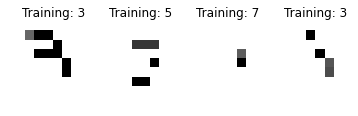

In [73]:
from sklearn import cross_validation
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier


#digits = datasets.load_digits()
#images_and_labels = list(zip(digits.images, digits.target))
images_and_labels = list(zip(mydata, mytarget))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    image=np.reshape(image,(8,8))
    
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(mydata15)
#n_samples = len(digits.images)

data = mydata15.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
pre=[]
for g in range(100):
    cl = svm.SVC(gamma= g / 10000. )
    #cl= KNeighborsClassifier(n_neighbors=1)
    #cl = RandomForestClassifier(n_estimators=10)
    #cl = ExtraTreesClassifier(n_estimators=10)
    #cl = AdaBoostClassifier(n_estimators=100)
    #cl = GradientBoostingClassifier(n_estimators=100)
    x=mydata15
    y=mytarget15
    classifier=np.mean(cross_val_score(cl,x,y,cv=StratifiedKFold(y,5)))
    pre.append(classifier)
    #print("gamma: %f,precision: %s\n" % (g / 10000.,classifier))

print("gamma: %f,precision: %s\n" % (np.argmax(np.array(pre))/ 10000.,np.max(np.array(pre))))

cl.fit(mydata15,mytarget15)


In [72]:
np.argmax(np.array(pre))

9

In [68]:
from sklearn.externals import joblib

joblib.dump(cl, "./machine_0323.pkl")

['./machine_0323.pkl',
 './machine_0323.pkl_01.npy',
 './machine_0323.pkl_02.npy',
 './machine_0323.pkl_03.npy',
 './machine_0323.pkl_04.npy',
 './machine_0323.pkl_05.npy',
 './machine_0323.pkl_06.npy',
 './machine_0323.pkl_07.npy',
 './machine_0323.pkl_08.npy',
 './machine_0323.pkl_09.npy',
 './machine_0323.pkl_10.npy',
 './machine_0323.pkl_11.npy']